In [6]:
!pip install scikit-learn

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

In [4]:
n = 50
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 3, n) * np.linspace(0.01, 3, n) + np.random.rand(n) - .5


plt.scatter(x,y)

array([[0.01      ],
       [0.03020408],
       [0.05040816],
       [0.07061224],
       [0.09081633],
       [0.11102041],
       [0.13122449],
       [0.15142857],
       [0.17163265],
       [0.19183673],
       [0.21204082],
       [0.2322449 ],
       [0.25244898],
       [0.27265306],
       [0.29285714],
       [0.31306122],
       [0.33326531],
       [0.35346939],
       [0.37367347],
       [0.39387755],
       [0.41408163],
       [0.43428571],
       [0.4544898 ],
       [0.47469388],
       [0.49489796],
       [0.51510204],
       [0.53530612],
       [0.5555102 ],
       [0.57571429],
       [0.59591837],
       [0.61612245],
       [0.63632653],
       [0.65653061],
       [0.67673469],
       [0.69693878],
       [0.71714286],
       [0.73734694],
       [0.75755102],
       [0.7777551 ],
       [0.79795918],
       [0.81816327],
       [0.83836735],
       [0.85857143],
       [0.87877551],
       [0.89897959],
       [0.91918367],
       [0.93938776],
       [0.959

## Linear Regression - no regularization

In [10]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([8.85425019]), -1.5124671834995915)

## Linear "Ridge" Regression - L2 regularization

In [11]:
ridge = linear_model.Ridge(alpha=.5)

ridge.fit(x, y)

ridge.coef_, ridge.intercept_

(array([7.92230894]), -1.0418368522931027)

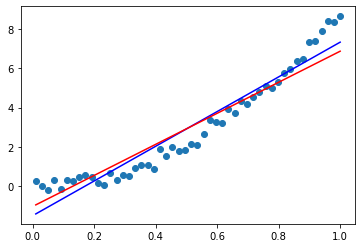

In [12]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='r')

Clearly Linear 1 degree (y = m x) don't fix very well

## Let's try $x^{15}$ polynomial!

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

x_15 = poly.fit_transform(x.reshape(-1, 1))

In [18]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00, -4.95350619e+01,  1.57121525e+03, -2.91068020e+04,
         3.53798874e+05, -2.80832513e+06,  1.47274062e+07, -5.21416518e+07,
         1.26760981e+08, -2.12629678e+08,  2.42860260e+08, -1.80738556e+08,
         7.77169569e+07, -1.13574758e+07, -4.22412666e+06,  1.50800368e+06]),
 0.6225131641014734)

In [19]:
ridge = linear_model.Ridge()

ridge.fit(x_15, y)

(ridge.coef_, ridge.intercept_)

(array([ 0.        ,  2.32674823,  2.18028318,  1.68276181,  1.22463483,
         0.86490735,  0.59370162,  0.39052609,  0.23730618,  0.12036047,
         0.02981768, -0.04134182, -0.09810538, -0.14403595, -0.18170115,
        -0.21297087]),
 0.06906488537579047)

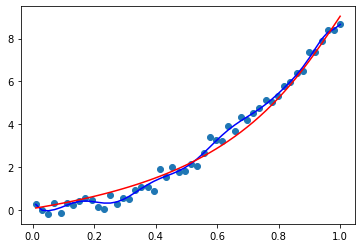

In [20]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

We can see that the non-ridge model fits points very well. But how does it fare for new points?

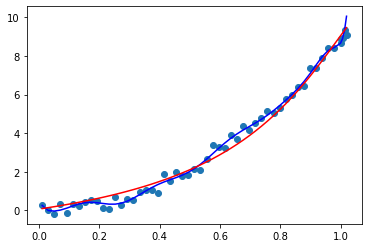

In [21]:
m = 4
x_final = 1.02
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

Clearly, the new predictions are not so great.

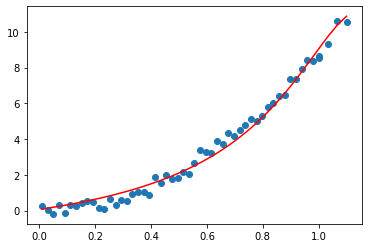

In [22]:
m = 4
x_final = 1.1
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

The Ridge model fares better for new values. 

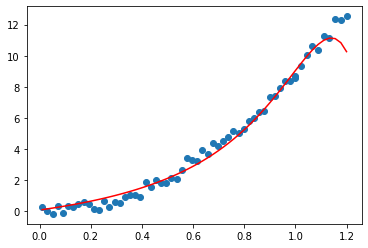

In [23]:
m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

But not all new values

## Back to $x^2$ degree model 

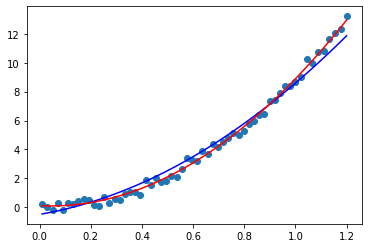

In [24]:
poly2 = PolynomialFeatures(degree=2)

m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_poly = poly2.fit_transform(x2)

y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


ridge = linear_model.Ridge()
ridge.fit(x_poly, y2)

model = linear_model.LinearRegression()
model.fit(x_poly, y2)

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_poly, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x2, np.dot(x_poly, model.coef_) + model.intercept_, c='r')